In [2]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import emoji

# Load data 💽

In [3]:
df = pd.read_csv("Data/clean_by_date_comments.csv")

# Clean Data 🛀

Create new column to categorize the language used in each row. Drop undetectable comments.

In [4]:
df["language"] = None # create new column

undetectable = []
for idx, row in df.iterrows():
    try:
        language = detect(df['text'][idx])
        df.at[idx, 'language'] = language
    except:
        language = "error"
        undetectable.append(idx)
        df.at[idx, 'language'] = None

df = df.dropna() # drop undetectable columns

Exploration on language counts

In [5]:
print("count of language undetectable comments from dataset: ", len(undetectable))
print()

languages = df['language'].unique()
print("unique languages: ", languages)

count of language undetectable comments from dataset:  8590

unique languages:  ['hu' 'en' 'af' 'sw' 'it' 'fi' 'pt' 'es' 'sl' 'fa' 'id' 'ro' 'ca' 'fr'
 'so' 'ko' 'de' 'no' 'tl' 'he' 'pl' 'lv' 'cy' 'ur' 'sv' 'sk' 'hr' 'nl'
 'da' 'tr' 'ar' 'lt' 'et' 'sq' 'cs' 'vi' 'ru' 'ja' 'zh-cn' 'bn' 'el' 'bg'
 'mk' 'ml' 'th' 'mr' 'uk' 'gu' 'ne' 'hi' 'ta']


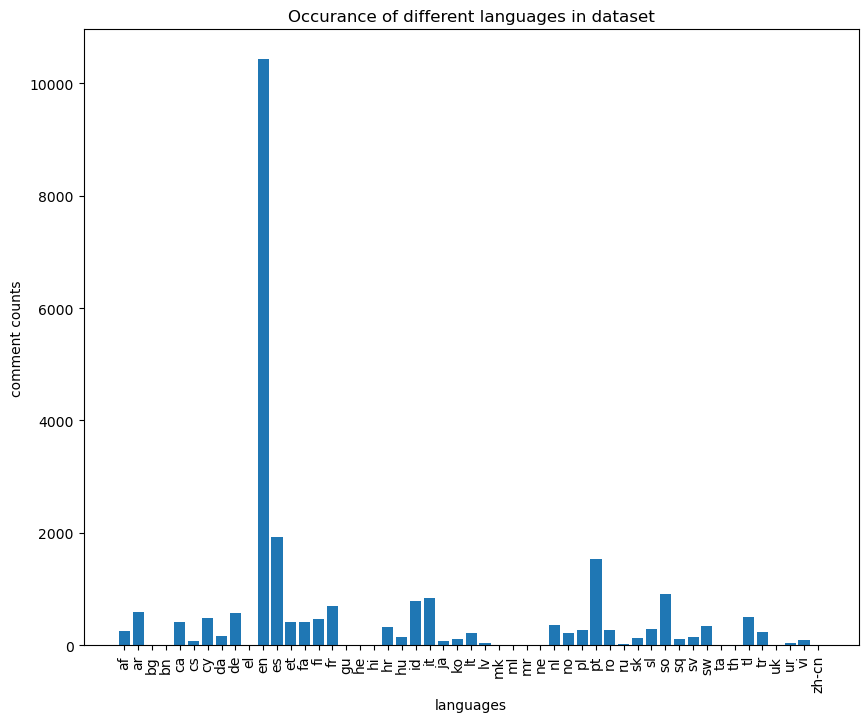

In [7]:
df2 = df.pivot_table(index='language', aggfunc='size')

plt.figure(figsize=(10, 8))
plt.bar(df2.index, df2.values)
plt.title("Occurance of different languages in dataset")
plt.xticks(rotation=90)
plt.xlabel("languages")
plt.ylabel("comment counts")
plt.show()


# Select English and Spanish with Emojis ✅

Create new dataframes for English and Spanish only.

In [82]:
def count_words(text):
    return len(text.split())

def emoji_list(text):
    emoji_list = []
    for char in text:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)
    return emoji_list

In [83]:
new_df = df[(df['language']=='es') | (df['language']=='en')]
new_df['word count'], new_df['emoji count'], new_df['emoji list'] = None, None, None

new_df['word count'] = new_df['text'].apply(count_words)
new_df['emoji list'] = new_df['text'].apply(emoji_list)
new_df['emoji count'] = new_df['emoji list'].apply(len)


cleaned_df = new_df[(new_df['word count'] > 0) & (new_df['emoji count'] > 0)]

cleaned_df

/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_37370/2687124308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word count'], new_df['emoji count'], new_df['emoji list'] = None, None, None
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_37370/2687124308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word count'], new_df['emoji count'], new_df['emoji list'] = None, None, None
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_37370/2687124308.py:2: Sett

,Unnamed: 0,id,likesCount,ownerProfilePicUrl,ownerUsername,postUrl,text,timestamp,language,word count,emoji count,emoji list
19,20741,17888460851738491,2,https://instagram.famd6-1.fna.fbcdn.net/v/t51....,elnaazii,https://www.instagram.com/p/ClLiftGtMx9/,Thank you England for being our voice. 🏴󠁧󠁢󠁥󠁮󠁧󠁿...,2022-11-20 20:59:37+00:00,en,13,1,[🏴]
20,19819,17989943656574386,0,https://instagram.faqb1-1.fna.fbcdn.net/v/t51....,bouafiamine010,https://www.instagram.com/p/ClLYUYBri2H/,Afifiy what are you doing here 😂😂😂,2022-11-20 21:02:12+00:00,en,7,3,"[😂, 😂, 😂]"
36,20748,17949394271172791,1,https://instagram.famd6-2.fna.fbcdn.net/v/t51....,yfrenkie,https://www.instagram.com/p/ClLiftGtMx9/,Come on guys 🏴󠁧󠁢󠁥󠁮󠁧󠁿,2022-11-20 22:09:09+00:00,en,4,1,[🏴]
61,20759,18254178268189747,0,https://instagram.famd6-2.fna.fbcdn.net/v/t51....,yadi.stiadi23,https://www.instagram.com/p/ClLiftGtMx9/,why maguire brought 🤣,2022-11-21 03:34:11+00:00,en,4,1,[🤣]
63,19830,17878452251773813,2,https://instagram.fgua5-1.fna.fbcdn.net/v/t51....,alfie.castaneda,https://www.instagram.com/p/ClLYUYBri2H/,Im at the industrial zone. 😉,2022-11-21 03:53:31+00:00,en,6,1,[😉]
...,...,...,...,...,...,...,...,...,...,...,...,...
33657,12268,17936594864426487,1,https://instagram.fosl6-1.fna.fbcdn.net/v/t51....,chaimahouas,https://www.instagram.com/p/Cll_BfvL1C3/,@neubay03 HHHHHHH maybe.. but until NOW let me...,2022-12-18 23:42:27+00:00,en,15,1,[🥰]
33665,2244,17934338813593391,1,https://instagram.flim1-2.fna.fbcdn.net/v/t51....,abdel_ali_22,https://www.instagram.com/p/CmPsNQiM6X4/,@alemvpl de nada vamos argentina 🤍💙,2022-12-18 23:50:39+00:00,es,6,2,"[🤍, 💙]"
33666,3867,18006444106524437,0,https://scontent-gig4-2.cdninstagram.com/v/t51...,hind___ag,https://www.instagram.com/p/CmIXxwdNd_k/,@isapagan42 that what it should 🤷🏻‍♀️,2022-12-18 23:51:05+00:00,en,6,3,"[🤷, 🏻, ♀]"
33667,2030,18059087008335717,0,https://scontent-gru1-1.cdninstagram.com/v/t51...,crimnal_0777,https://www.instagram.com/p/CmRjxOvIz1J/,@ivana__.__.__ thanks we both survived to the ...,2022-12-18 23:53:03+00:00,en,18,2,"[♥, 👏]"


Graphing cleaned data.

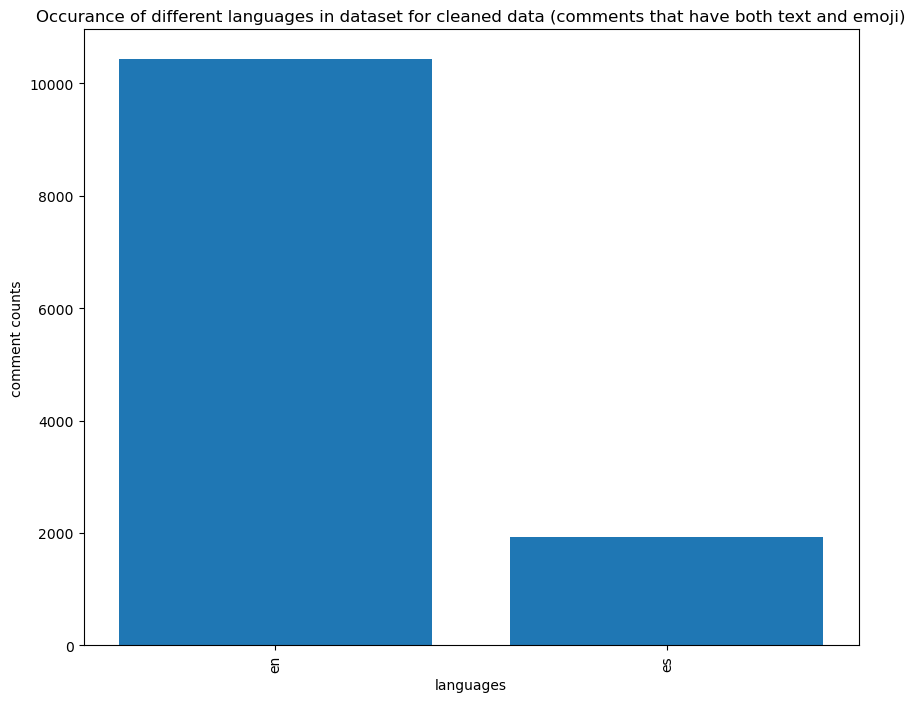

In [84]:
df3 = new_df.pivot_table(index='language', aggfunc='size')

plt.figure(figsize=(10, 8))
plt.bar(df3.index, df3.values)
plt.title("Occurance of different languages in dataset for cleaned data (comments that have both text and emoji)")
plt.xticks(rotation=90)
plt.xlabel("languages")
plt.ylabel("comment counts")
plt.show()

Download to csv.

In [ ]:
cleaned_df.to_csv("Data/cleaned_by_language.csv")